# Exercises for Session 8: Advanced Web Scraping and Regex

In this Exercise Set we shall develop our web scraping skills even further by practicing using `Selenium` while parsing and navigating HTML trees using `BeautifulSoup`. Furthermore we will train extracting information from raw text with no HTML tags to help using `Regex`. 

# Part 1: Translating domains into companies
This exercise is about solving a problem that some of you may face in the future. All webshops (and most other websites) have a company as their owner. In some situations it might be useful to know which company owns the domain of the webshop and investigate the background of the company.

It is what we will do in this exercise. We will use www.netbaby.dk as an example, but the procedure can be scaled to 1000s of websites. This is where automated browsing and web scraping shines! With just one website we can easily find the information by hand, but with 1000s of websites we need automated web scraping.

Remember to watch the video (8.1) below before moving on to the exercises:

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('reO8F8orK3I', width=640, height=360)

> **Ex. 8.1.1:** Use `Selenium` to go to the website https://www.dk-hostmaster.dk/da/find-domaenenavn and search for "netbaby.dk". 

> Under "Registrant" you can see the name ("Navn") of the company behind netbaby.dk. Use `BeautifulSoup` to find the name of the company and store it in the variable `company`. 
> - I.e., you need to use the skills you developed in session 7 to locate the name of the company in the HTML and extract the name from the HTML

In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By

# We open up google.com in a virtual browser
url = 'https://www.dk-hostmaster.dk/da/find-domaenenavn'

# We need to import the ChromeDriverManager to download and set up the Chrome driver
driver = webdriver.Chrome() # Download and install the Chrome driver

# Once the driver is set up, we can use it to navigate to the provided URL
driver.get(url) # Go to google.com

In [ ]:
cookie = driver.find_element(By.CSS_SELECTOR, '#CybotCookiebotDialogBodyLevelButtonLevelOptinAllowAll') #Here we use a CSS selector
cookie.click()

In [ ]:
# Find the place to type in search text
candidate = driver.find_element(By.ID, 'edit-domain')
candidate.click() #And click

# Type the search text
candidate.send_keys('netbaby.dk') #Use the `.send_keys` to type text. `.send_keys` imitates your computer keyboard, so you can for example also press the 'Return' or 'PgDn' botton.

# Find the place to submit the text
candidate = driver.find_element(By.ID, 'edit-submit')
candidate.click()

In [ ]:
from bs4 import BeautifulSoup

# Use BeautifulSoup to parse the page source
soup = BeautifulSoup(driver.page_source, 'lxml')

# Find the place where the name is found
results = soup.find_all('span', class_='info-text__text')  

company = results[3].text.strip()

print(company)  # Print the name of the company

driver.quit()  # Don't forget to close the browser

> **Ex. 8.1.2:** Now we know who owns the domain and would like to know more about the company Euphemia Media. 

> 1. Go to the Central Business Register (the CVR) website https://datacvr.virk.dk/data/. Search for Euphemia Media using `Selenium`. 
> 2. You will find 2 search results. Use `Selenium` to click on the first result.
> 3. When you get to the first search result, use `BeautifulSoup` to store the CVR number in the variable *cvr*.

In [130]:
# We open up google.com in a virtual browser
url_CVR= 'https://datacvr.virk.dk/data/'

# We need to import the ChromeDriverManager to download and set up the Chrome driver
driver = webdriver.Chrome() # Download and install the Chrome driver

# Once the driver is set up, we can use it to navigate to the provided URL
driver.get(url_CVR) # Go to google.com

In [131]:
cookie = driver.find_element(By.CSS_SELECTOR, '.cpAcceptBtn') #Here we use a CSS selector
cookie.click()

In [132]:
search_input = driver.find_element(By.ID, 'forside-soegefelt-id')
search_input.click() #And click

search_input.send_keys('Euphemia Media')


# Find the place to type in search text
candidate = driver.find_element(By.ID, 'forside-soegefelt-id')
candidate.click() #And click

# Type the search text
candidate.send_keys('netbaby.dk') #Use the `.send_keys` to type text. `.send_keys` imitates your computer keyboard, so you can for example also press the 'Return' or 'PgDn' botton.

# Find the place to submit the text
candidate = driver.find_element(By.ID, 'edit-submit')
candidate.click()

#### Note:
The Central Business Register actually also have an API: https://datacvr.virk.dk/artikel/system-til-system-adgang-til-cvr-data.

Whenever there is an API available, you should use it. It is way more reliable than trying to web scrape the webpage by yourself.

We just did it in this exercise for educational purposes.

# Part 2: Practicing Regular Expressions

In this exercise you will gain experience in working with regular expressions. Regular expressions takes time to get used to, so do not panic if you do not understand the intuition at first. The only way to get familiar with their structure and applicability is to work with them. 

And they ARE very useful! I promise you that if you at some point are going to work with text as data, then you will find RegEx solutions to your problems. They are all over StackOverflow. We will only scratch the surface, but you will soon become better when you apply RegEx to your own text analysis problems.

Note: A good webpage to have in mind is this one: www.regular-expressions.info/refquick.html. It contains all special symbols that RegEx uses.

Before moving to the exercises below, remember to watch the following video (8.2):

(I might talk a bit slow in some of the videos. Remember that you can turn up the speed on Youtube)

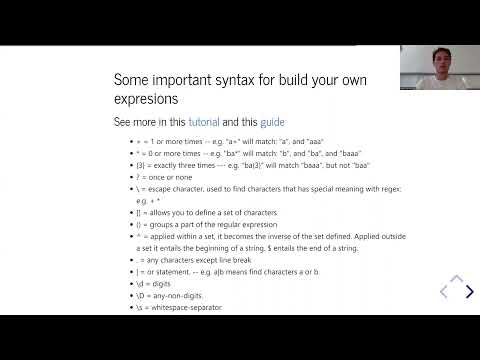

In [133]:
YouTubeVideo('5vCE_7KSO7Y', width=640, height=360)

To practice RegEx we will use a review from a dataset with Trustpilot reviews collected by a colleague Snorre Ralund.
You can load it directly into python using the code below:

In [134]:
import pandas as pd
import re

# Download data
path2data = 'https://raw.githubusercontent.com/snorreralund/scraping_seminar/master/english_review_sample.csv'
df = pd.read_csv(path2data)

# Take the review we are going to play with
review = df.reviewBody[6]

In [135]:
review

"I've been to the 'other' sac store in the Mall of America many times and my wife and I always leave the store wanting a big comfy sac to lounge in... but the cost just doesn't add up.  I don't mind paying for good products, but there is a point where things are just too expensive.\r\n\r\nI did my research online, found Comfy Sacks and after much contemplation I decided if Comfy Sacks are good enough for Amazon/Apple Corp, then they'd be good enough for me.\r\n\r\nI chose the 6ft sack with a brown textured premium suede.  Wow, is all I can say!!  Quality is amazing, comfort is great and it fits my whole family (Wife, 5yo daughter and me).\r\n\r\n*You do have to 'fluff' it every now and then and it's shipped in such a tight vacuum packed 'block' it does take a fair amount of effort to de-compress it the first time.  Check Youtube for other reviews, it was very helpful for me.\r\n\r\nOverall, I'd recommend this to anyone looking at the $900+ alternatives."

> **Ex. 8.2.1:** First, we are interested in the *first* number in the review. Make a regular expression that matches the first number in the text.

In [137]:
# Regular expression to find the first number in the review
pattern = r'\d+'

# Find the first number using re.search()
match = re.search(pattern, review)

# Extract and print the first number
if match:
    first_number = match.group()
    print("First number:", first_number)
else:
    print("No number found in the review.")

First number: 6


> **Ex. 8.2.2:** Now, we are interested in *all* the numbers in the review. Make a regular expression that matches all numbers in the text.

> Afterwards make a new regex that only matches numbers with a non-alphanumeric character (\$, +, etc.) before and after the number. Include the non-alphanumeric characters in the match (for example \\$900+).

In [139]:
# Regular expression to find all numbers in the review
pattern_all_numbers = r'\d+'

# Find all numbers using re.findall()
all_numbers = re.findall(pattern_all_numbers, review)

# Print all the numbers found in the review
print("All numbers in the review:", all_numbers)

All numbers in the review: ['6', '5', '900']


In [140]:
# Regular expression to find numbers with non-alphanumeric characters before and after them
pattern_numbers_with_non_alphanumeric = r'\D(\d+\W+)\D'

# Find all numbers with non-alphanumeric characters using re.findall()
numbers_with_non_alphanumeric = re.findall(pattern_numbers_with_non_alphanumeric, review)

# Print all the numbers with non-alphanumeric characters found in the review
print("Numbers with non-alphanumeric characters:", numbers_with_non_alphanumeric)

Numbers with non-alphanumeric characters: ['900+ ']


> **Ex. 8.2.3:** Let's say we want the text inside the parenthesis in the review. Write a regex that matches that.

In [141]:
# Regular expression to find text inside parentheses
pattern_inside_parentheses = r'\((.*?)\)'

# Find all text inside parentheses using re.findall()
text_inside_parentheses = re.findall(pattern_inside_parentheses, review)

# Print the text inside parentheses found in the review
print("Text inside parentheses:", text_inside_parentheses)

Text inside parentheses: ['Wife, 5yo daughter and me']


> **Ex. 8.2.4:** The review consists of different lines with line breaks. Split the text into each line and store them in a list.

In [142]:
# Split the review into separate lines and store them in a list
lines_list = review.splitlines()

# Print each line
for line in lines_list:
    print(line)

I've been to the 'other' sac store in the Mall of America many times and my wife and I always leave the store wanting a big comfy sac to lounge in... but the cost just doesn't add up.  I don't mind paying for good products, but there is a point where things are just too expensive.

I did my research online, found Comfy Sacks and after much contemplation I decided if Comfy Sacks are good enough for Amazon/Apple Corp, then they'd be good enough for me.

I chose the 6ft sack with a brown textured premium suede.  Wow, is all I can say!!  Quality is amazing, comfort is great and it fits my whole family (Wife, 5yo daughter and me).

*You do have to 'fluff' it every now and then and it's shipped in such a tight vacuum packed 'block' it does take a fair amount of effort to de-compress it the first time.  Check Youtube for other reviews, it was very helpful for me.

Overall, I'd recommend this to anyone looking at the $900+ alternatives.
